In [9]:
!pip install yfinance
!pip install matplotlib



In [19]:
!pip install beautifulsoup4

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests


In [21]:
# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2022-01-01')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first 5 rows
tesla_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [26]:
# Get Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

# Find the revenue table
tables = soup.find_all('table')
tesla_revenue = pd.read_html(str(tables))[1]  # Second table is Tesla Revenue

# Drop NaN values
tesla_revenue.dropna(inplace=True)

# Display the last 5 rows
tesla_revenue.tail()


/tmp/ipykernel_167/2741428344.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables))[1]  # Second table is Tesla Revenue


ValueError: No tables found

In [27]:
# Download GameStop stock data
gme_data = yf.download('GME', start='2010-01-01', end='2022-01-01')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
gme_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2010-01-04,3.854644,3.863060,3.703151,3.714934,26702800
1,2010-01-05,3.959004,3.996036,3.854643,3.856326,21269600
2,2010-01-06,4.044850,4.056633,3.908506,3.948904,21471200
3,2010-01-07,3.443930,3.563441,3.268872,3.368184,164761200
4,2010-01-08,3.415315,3.573540,3.405215,3.474228,47872400


In [28]:
# Get GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

# Find the revenue table
tables = soup.find_all('table')
gme_revenue = pd.read_html(str(tables))[1]  # Second table is GameStop Revenue

# Drop NaN values
gme_revenue.dropna(inplace=True)

# Display the last 5 rows
gme_revenue.tail()


/tmp/ipykernel_167/2856019394.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables))[1]  # Second table is GameStop Revenue


ValueError: No tables found

KeyError: 'Revenue'

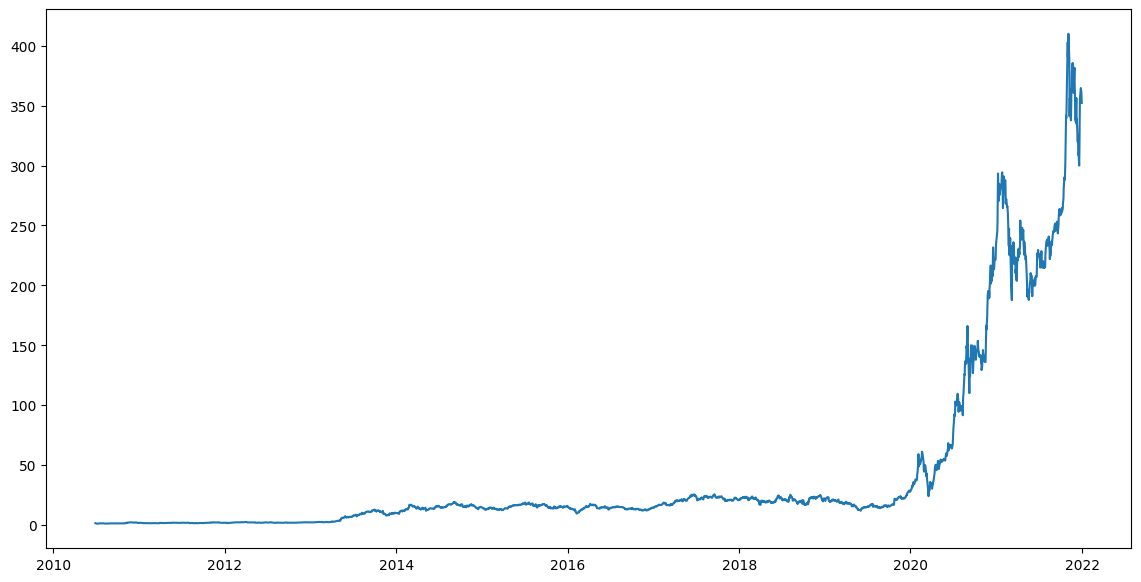

In [29]:
# Function to make graphs
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))

    # Plot stock prices
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')

    # Format revenue data for plotting
    revenue_data['Revenue'] = revenue_data['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', linestyle='--')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot Tesla data
make_graph(tesla_data, tesla_revenue, "Tesla Stock Price vs Revenue")

# Plot GameStop data
make_graph(gme_data, gme_revenue, "GameStop Stock Price vs Revenue")
